# All Columns

In [ ]:
['Record ID', 'Status do contato de marketing', 'Data de criação',
 'Cumulative time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Lead qualificado para venda (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Oportunidade (Pipeline da fase do ciclo de vida)" (HH:mm:ss)', 'Data em que se tornou um cliente',
 'Data em que se tornou um lead', 'Data em que se tornou uma oportunidade',
 'Data em que tornou-se um lead qualificado de vendas', 'Data em que tornou-se um lead qualificado para marketing',
 'Date exited "Lead (Pipeline da fase do ciclo de vida)"',
 'Date exited "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)"',
 'Date exited "Lead qualificado para venda (Pipeline da fase do ciclo de vida)"',
 'Date exited "Oportunidade (Pipeline da fase do ciclo de vida)"', 'Pontuação do HubSpot', 'Prioridade de contato',
 'Probabilidade de fechamento', 'Área de interesse', 'Detalhamento da fonte mais recente 1',
 'Detalhamento da fonte mais recente 2', 'Fonte Original [Editável]', 'Fonte mais recente', 'Fonte original aprofundada 1',
 'Fonte original aprofundada 2', 'Primeira página vista', 'Primeiro site de referência', 'fonte_original_conteudo',
 'Última página vista', 'Último site de referência', 'Cidade do IP', 'Data da primeira abertura do e-mail de marketing',
 'Data da última abertura do e-mail de marketing', 'Data do primeiro clique do e-mail de marketing',
 'Data do último clique do e-mail de marketing', 'E-mails de marketing abertos', 'E-mails de marketing clicados',
 'Status do Plano', 'Bloquear Recebimento de Whatsapp', 'Contato criado pelo whatsapp']

['Record ID',
 'Status do contato de marketing',
 'Data de criação',
 'Cumulative time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Lead qualificado para venda (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Oportunidade (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Data em que se tornou um cliente',
 'Data em que se tornou um lead',
 'Data em que se tornou uma oportunidade',
 'Data em que tornou-se um lead qualificado de vendas',
 'Data em que tornou-se um lead qualificado para marketing',
 'Date exited "Lead (Pipeline da fase do ciclo de vida)"',
 'Date exited "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)"',
 'Date exited "Lead qualificado para venda (Pipeline da fase do ciclo de vida)"',
 'Date exited "Oportunidade (Pipeline da fase do ciclo de vida)"',
 'Pontuação do HubSpot',
 'Prioridade de

# Libraries Load

In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 14.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=ec0353a1cb6241e96cc25570f0d7dfe3b55033021e26966cfa6fc2f2d5556848
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter
from lifelines.fitters.exponential_fitter import ExponentialFitter
import warnings

warnings.filterwarnings('ignore')

# Libraries to data processing
import pandas as pd
import numpy as np

# Libraries to plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from datetime import timedelta
from datetime import date, datetime
from datetime import time

# Functions

In [ ]:
# Show key information
def show_keyinfo(df):

    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
        'pc_missing': pc_missing
    })

    return output

# EDA

In [ ]:
EST = pd.read_excel('Estudo Série Temporal.xlsx')
EST

Record ID      Nome               Sobrenome  \
0      144181401   Maurino  Urbano da Silva Júnior   
1      153749801   Luanna                Nogueira    
2      153487651    Suzana                Nakakima   
3      147982551  Anderson                  Araújo   
4      146671801   Jessica                   Lopes   
...          ...       ...                     ...   
85819  103545301  Amarílis          Ágata da Silva   
85820  152041201   Letícia          Araújo Miranda   
85821  146798401    THALES             DE MEDEIROS   
85822   99613201  Priscila                     NaN   
85823   96336451     Lucas                  behmer   

                                  E-mail Data da última atividade  \
0                    maurinojr@gmail.com                      NaT   
1                   luannat91@oulook.com                      NaT   
2                 suzanakajima@gmail.com                      NaT   
3                anderson.oult@gmail.com                      NaT   
4      jessica.gabriela91lopes@gmail.com                      NaT   
...                                  ...                      ...   
85819           amarilisagata1@gmail.com      2023-03-10 09:21:00   
85820    leticiamirandacontact@gmail.com                      NaT   
85821              thalesmmnds@gmail.com                      NaT   
85822             priscila.seg@gmail.com                      NaT   
85823             lucasbehmerg@gmail.com                      NaT   

      Status do lead Status do contato de marketing     Data de criação  \
0                NaN           Contato de marketing 2023-09-29 08:55:00   
1                NaN          Contato não marketing 2023-11-05 14:14:00   
2                NaN           Contato de marketing 2023-11-04 07:43:00   
3                NaN           Contato de marketing 2023-10-16 06:08:00   
4                NaN           Contato de marketing 2023-10-11 12:49:00   
...              ...                            ...                 ...   
85819            NaN          Contato não marketing 2023-03-08 23:04:00   
85820            NaN           Contato de marketing 2023-10-26 21:50:00   
85821            NaN           Contato de marketing 2023-10-11 15:36:00   
85822            NaN          Contato não marketing 2023-02-14 22:48:00   
85823            NaN           Contato de marketing 2023-01-28 13:46:00   

      Cidade  \
0        NaN   
1        NaN   
2        NaN   
3        NaN   
4        NaN   
...      ...   
85819    NaN   
85820    NaN   
85821    NaN   
85822    NaN   
85823    NaN   

      Cumulative time in "Cliente (Pipeline da fase do ciclo de vida)" (HH:mm:ss)  \
0                                                    NaN                            
1                                                    NaN                            
2                                                    NaN                            
3                                                    NaN                            
4                                                    NaN                            
...                                                  ...                            
85819                                                NaN                            
85820                                                NaN                            
85821                                                NaN                            
85822                                                NaN                            
85823                                                NaN                            

       ...          Cidade do IP  \
0      ...             sao paulo   
1      ...                   NaN   
2      ...        rio de janeiro   
3      ...                   NaN   
4      ...        belo horizonte   
...    ...                   ...   
85819  ...  sao lourenco da mata   
85820  ...             sao paulo   
85821  ...                   NaN   
85822  ...             sao paulo   
85823  ...        

In [ ]:
show_keyinfo(EST)

variable           dtype  count  \
0                                           Record ID           int64  85824   
1                                                Nome          object  85824   
2                                           Sobrenome          object  85824   
3                                              E-mail          object  85824   
4                            Data da última atividade  datetime64[ns]  85824   
5                                      Status do lead          object  85824   
6                      Status do contato de marketing          object  85824   
7                                     Data de criação  datetime64[ns]  85824   
8                                              Cidade          object  85824   
9   Cumulative time in "Cliente (Pipeline da fase ...          object  85824   
10  Cumulative time in "Assinante (Pipeline da fas...         float64  85824   
11  Cumulative time in "Lead (Pipeline da fase do ...          object  85824   
12  Cumulative time in "Lead qualificado para mark...          object  85824   
13  Cumulative time in "Lead qualificado para vend...          object  85824   
14  Cumulative time in "Oportunidade (Pipeline da ...          object  85824   
15  Cumulative time in "Outro (Pipeline da fase do...         float64  85824   
16  Cumulative time in "Promotor (Pipeline da fase...         float64  85824   
17                           Date of first engagement  datetime64[ns]  85824   
18                        Data do último envolvimento  datetime64[ns]  85824   
19                 Data em que se tornou um assinante         float64  85824   
20                   Data em que se tornou um cliente  datetime64[ns]  85824   
21                      Data em que se tornou um lead  datetime64[ns]  85824   
22             Data em que se tornou uma oportunidade  datetime64[ns]  85824   
23  Data em que tornou-se um lead qualificado de v...  datetime64[ns]  85824   
24  Data em que tornou-se um lead qualificado para...  datetime64[ns]  85824   
25  Date exited "Cliente (Pipeline da fase do cicl...  datetime64[ns]  85824   
26  Date exited "Lead (Pipeline da fase do ciclo d...  datetime64[ns]  85824   
27  Date exited "Lead qualificado para marketing (...  datetime64[ns]  85824   
28  Date exited "Lead qualificado para venda (Pipe...  datetime64[ns]  85824   
29  Date exited "Oportunidade (Pipeline da fase do...  datetime64[ns]  85824   
30                               Pontuação do HubSpot         float64  85824   
31                              Prioridade de contato          object  85824   
32                        Probabilidade de fechamento         float64  85824   
33                                  Área de interesse          object  85824   
34               Detalhamento da fonte mais recente 1          object  85824   
35               Detalhamento da fonte mais recente 2          object  85824   
36                          Fonte Original [Editável]          object  85824   
37                                 Fonte mais recente          object  85824   
38                       Fonte original aprofundada 1          object  85824   
39                       Fonte original aprofundada 2          object  85824   
40                              Primeira página vista          object  85824   
41                        Primeiro site de referência          object  85824   
42                            fonte_original_conteudo          object  85824   
43                                Última página vista          object  85824   
44                          Último site de referência          object  85824   
45                                       Cidade do IP          object  85824   
46   Data da primeira abertura do e-mail de marketing  datetime64[ns]  85824   
47     Data da última abertura do e-mail de marketing  datetime64[ns]  85824   
48     Data do primeiro clique do e-mail de marketing  datetime64[ns]  85824   
49       Data do último clique do e-mail de m

In [ ]:
#Removing columns with high percentage of null values
EST = EST.drop(columns=['Nome', 'Sobrenome', 'E-mail', 'Data da última atividade', 'Status do lead', 'Cidade', 'Cumulative time in "Cliente (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
                        'Cumulative time in "Assinante (Pipeline da fase do ciclo de vida)" (HH:mm:ss)', 'Cumulative time in "Outro (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
                        'Cumulative time in "Promotor (Pipeline da fase do ciclo de vida)" (HH:mm:ss)', 'Date of first engagement', 'Data do último envolvimento',
                        'Data em que se tornou um assinante', 'Date exited "Cliente (Pipeline da fase do ciclo de vida)"'])

In [ ]:
show_keyinfo(EST)

variable           dtype  count  \
0                                           Record ID           int64  85824   
1                      Status do contato de marketing          object  85824   
2                                     Data de criação  datetime64[ns]  85824   
3   Cumulative time in "Lead (Pipeline da fase do ...          object  85824   
4   Cumulative time in "Lead qualificado para mark...          object  85824   
5   Cumulative time in "Lead qualificado para vend...          object  85824   
6   Cumulative time in "Oportunidade (Pipeline da ...          object  85824   
7                    Data em que se tornou um cliente  datetime64[ns]  85824   
8                       Data em que se tornou um lead  datetime64[ns]  85824   
9              Data em que se tornou uma oportunidade  datetime64[ns]  85824   
10  Data em que tornou-se um lead qualificado de v...  datetime64[ns]  85824   
11  Data em que tornou-se um lead qualificado para...  datetime64[ns]  85824   
12  Date exited "Lead (Pipeline da fase do ciclo d...  datetime64[ns]  85824   
13  Date exited "Lead qualificado para marketing (...  datetime64[ns]  85824   
14  Date exited "Lead qualificado para venda (Pipe...  datetime64[ns]  85824   
15  Date exited "Oportunidade (Pipeline da fase do...  datetime64[ns]  85824   
16                               Pontuação do HubSpot         float64  85824   
17                              Prioridade de contato          object  85824   
18                        Probabilidade de fechamento         float64  85824   
19                                  Área de interesse          object  85824   
20               Detalhamento da fonte mais recente 1          object  85824   
21               Detalhamento da fonte mais recente 2          object  85824   
22                          Fonte Original [Editável]          object  85824   
23                                 Fonte mais recente          object  85824   
24                       Fonte original aprofundada 1          object  85824   
25                       Fonte original aprofundada 2          object  85824   
26                              Primeira página vista          object  85824   
27                        Primeiro site de referência          object  85824   
28                            fonte_original_conteudo          object  85824   
29                                Última página vista          object  85824   
30                          Último site de referência          object  85824   
31                                       Cidade do IP          object  85824   
32   Data da primeira abertura do e-mail de marketing  datetime64[ns]  85824   
33     Data da última abertura do e-mail de marketing  datetime64[ns]  85824   
34     Data do primeiro clique do e-mail de marketing  datetime64[ns]  85824   
35       Data do último clique do e-mail de marketing  datetime64[ns]  85824   
36                       E-mails de marketing abertos         float64  85824   
37                      E-mails de marketing clicados         float64  85824   
38                                    Status do Plano          object  85824   
39                   Bloquear Recebimento de Whatsapp          object  85824   
40                       Contato criado pelo whatsapp          object  85824   

    unique  missing  pc_missing  
0    85824        0        0.00  
1        2        0        0.00  
2    55228        0        0.00  
3     2328    51614       60.14  
4     2262    81555       95.03  
5      527    85216       99.29  
6     2521    82864       96.55  
7     3139    81767       95.27  
8    45882    10960       12.77  
9     9921    74952       87.33  
10    1215    84480       98.43  
11   31917    49108       57.22  
12   29258    51618       60.14  
13    3808    81555       95.03  
14     279    85216       99.29  
15    2894    82864       96.55  
16      11        5        0.01  
17       6        1        0.00  
18    1289     4046        4.71  
19  

In [ ]:
# Testing the time progression
test = EST.drop(columns=['Status do contato de marketing',
 'Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Lead qualificado para venda (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Oportunidade (Pipeline da fase do ciclo de vida)" (HH:mm:ss)', 'Data em que se tornou um cliente', 'Data em que se tornou uma oportunidade',
 'Data em que tornou-se um lead qualificado de vendas',
 'Date exited "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)"',
 'Date exited "Lead qualificado para venda (Pipeline da fase do ciclo de vida)"',
 'Date exited "Oportunidade (Pipeline da fase do ciclo de vida)"', 'Pontuação do HubSpot', 'Prioridade de contato',
 'Probabilidade de fechamento', 'Área de interesse', 'Detalhamento da fonte mais recente 1',
 'Detalhamento da fonte mais recente 2', 'Fonte Original [Editável]', 'Fonte mais recente', 'Fonte original aprofundada 1',
 'Fonte original aprofundada 2', 'Primeira página vista', 'Primeiro site de referência', 'fonte_original_conteudo',
 'Última página vista', 'Último site de referência', 'Cidade do IP', 'Data da primeira abertura do e-mail de marketing',
 'Data da última abertura do e-mail de marketing', 'Data do primeiro clique do e-mail de marketing',
 'Data do último clique do e-mail de marketing', 'E-mails de marketing abertos', 'E-mails de marketing clicados',
 'Status do Plano', 'Bloquear Recebimento de Whatsapp', 'Contato criado pelo whatsapp'])
test

Record ID     Data de criação  \
0      144181401 2023-09-29 08:55:00   
1      153749801 2023-11-05 14:14:00   
2      153487651 2023-11-04 07:43:00   
3      147982551 2023-10-16 06:08:00   
4      146671801 2023-10-11 12:49:00   
...          ...                 ...   
85819  103545301 2023-03-08 23:04:00   
85820  152041201 2023-10-26 21:50:00   
85821  146798401 2023-10-11 15:36:00   
85822   99613201 2023-02-14 22:48:00   
85823   96336451 2023-01-28 13:46:00   

      Cumulative time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)  \
0                                               00:00:20                         
1                                                    NaN                         
2                                                    NaN                         
3                                                    NaN                         
4                                                    NaN                         
...                                                  ...                         
85819                                           00:00:46                         
85820                                                NaN                         
85821                                                NaN                         
85822                                                NaN                         
85823                                           00:00:04                         

      Data em que se tornou um lead  \
0               2023-09-29 08:55:00   
1               2023-11-05 14:14:00   
2               2023-11-04 07:43:00   
3               2023-10-16 06:08:00   
4               2023-10-11 12:49:00   
...                             ...   
85819           2023-03-08 23:11:00   
85820           2023-10-26 21:50:00   
85821           2023-10-11 15:36:00   
85822                           NaT   
85823           2023-01-28 13:46:00   

      Data em que tornou-se um lead qualificado para marketing  \
0                                    2023-09-29 08:55:00         
1                                                    NaT         
2                                                    NaT         
3                                                    NaT         
4                                                    NaT         
...                                                  ...         
85819                                2023-03-08 23:11:00         
85820                                                NaT         
85821                                                NaT         
85822                                2023-02-14 22:48:00         
85823                                2023-01-28 13:46:00         

      Date exited "Lead (Pipeline da fase do ciclo de vida)"  
0                                    2023-09-29 08:55:00      
1                                                    NaT      
2                                                    NaT      
3                                                    NaT      
4                                                    NaT      
...                                                  ...      
85819                                2023-03-08 23:11:00      
85820                                                NaT      
85821                                                NaT      
85822                                                NaT      
85823                                2023-01-28 13:46:00      

[85824 rows x 6 columns]

In [ ]:
test.loc[(test['Cumulative time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'] == '00:02:00')]

Record ID     Data de criação  \
1351   142999601 2023-09-21 10:09:00   
6019   145764251 2023-10-09 10:11:00   
22893  141596801 2023-09-14 10:21:00   
23944  144874901 2023-10-03 11:03:00   
26603  136615201 2023-08-26 18:23:00   
39311  138466901 2023-08-28 12:43:00   
39506  138467151 2023-08-28 12:43:00   
39650  138467301 2023-08-28 12:43:00   
79926  137745451 2023-08-24 14:11:00   
84271  149028504 2023-10-17 12:06:00   

      Cumulative time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)  \
1351                                            00:02:00                         
6019                                            00:02:00                         
22893                                           00:02:00                         
23944                                           00:02:00                         
26603                                           00:02:00                         
39311                                           00:02:00                         
39506                                           00:02:00                         
39650                                           00:02:00                         
79926                                           00:02:00                         
84271                                           00:02:00                         

      Data em que se tornou um lead  \
1351            2023-09-21 10:09:00   
6019            2023-10-09 10:11:00   
22893           2023-09-14 10:21:00   
23944           2023-10-03 11:03:00   
26603           2023-08-26 18:23:00   
39311           2023-08-28 12:43:00   
39506           2023-08-28 12:43:00   
39650           2023-08-28 12:43:00   
79926           2023-08-24 14:11:00   
84271           2023-10-17 12:06:00   

      Data em que tornou-se um lead qualificado para marketing  \
1351                                 2023-09-21 10:11:00         
6019                                 2023-10-09 10:13:00         
22893                                2023-09-14 10:23:00         
23944                                2023-10-03 11:05:00         
26603                                                NaT         
39311                                                NaT         
39506                                                NaT         
39650                                                NaT         
79926                                2023-08-24 14:13:00         
84271                                2023-10-17 12:08:00         

      Date exited "Lead (Pipeline da fase do ciclo de vida)"  
1351                                 2023-09-21 10:11:00      
6019                                 2023-10-09 10:13:00      
22893                                2023-09-14 10:23:00      
23944                                2023-10-03 11:05:00      
26603                                2023-08-26 18:25:00      
39311                                2023-08-28 12:45:00      
39506                                2023-08-28 12:45:00      
39650                                2023-08-28 12:45:00      
79926                                2023-08-24 14:13:00      
84271                                2023-10-17 12:08:00

In [ ]:
test = EST.drop(columns=['Record ID', 'Status do contato de marketing', 'Data de criação',
 'Cumulative time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Lead qualificado para venda (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
 'Cumulative time in "Oportunidade (Pipeline da fase do ciclo de vida)" (HH:mm:ss)', 'Data em que se tornou um cliente',
 'Data em que se tornou um lead', 'Data em que se tornou uma oportunidade',
 'Data em que tornou-se um lead qualificado de vendas', 'Data em que tornou-se um lead qualificado para marketing',
 'Date exited "Lead (Pipeline da fase do ciclo de vida)"',
 'Date exited "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)"',
 'Date exited "Lead qualificado para venda (Pipeline da fase do ciclo de vida)"',
 'Date exited "Oportunidade (Pipeline da fase do ciclo de vida)"', 'Pontuação do HubSpot', 'Prioridade de contato',
 'Probabilidade de fechamento', 'Área de interesse', 'Detalhamento da fonte mais recente 1',
 'Detalhamento da fonte mais recente 2', 'Fonte Original [Editável]', 'Fonte mais recente', 'Fonte original aprofundada 1',
 'Fonte original aprofundada 2', 'Primeira página vista', 'Primeiro site de referência', 'fonte_original_conteudo',
 'Última página vista', 'Último site de referência', 'Cidade do IP', 'Data da primeira abertura do e-mail de marketing',
 'Data da última abertura do e-mail de marketing', 'Data do primeiro clique do e-mail de marketing',
 'Data do último clique do e-mail de marketing', 'E-mails de marketing abertos', 'E-mails de marketing clicados',
 'Status do Plano', 'Bloquear Recebimento de Whatsapp', 'Contato criado pelo whatsapp'])

In [ ]:
test.loc[(test['Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'] < '00:00:00')]

Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)
51823                                           00:00:-8

In [ ]:
test.iloc[51823]

Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)    00:00:-8
Name: 51823, dtype: object

# Data Processing

In [ ]:
# There is a negative value on 'Cumulative time in "Lead qualificado para marketing...' so I'll replace it to zero
replace_map = {
    'Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)' : {'00:00:-8': '00:00:00' }
}

EST = EST.replace(replace_map)

In [ ]:
# Creating a variable of time until convertion to each funnel phase
EST['tempo_a'] = EST['Data em que se tornou um cliente'] - EST['Data de criação']
EST['tempo_a']

0                   NaT
1                   NaT
2                   NaT
3                   NaT
4                   NaT
              ...      
85819   1 days 10:08:00
85820               NaT
85821               NaT
85822               NaT
85823               NaT
Name: tempo_a, Length: 85824, dtype: timedelta64[ns]

In [ ]:
EST['tempo_conver_cl'] = EST['tempo_a'].dt.days
EST['tempo_conver_cl']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
85819    1.0
85820    NaN
85821    NaN
85822    NaN
85823    NaN
Name: tempo_conver_cl, Length: 85824, dtype: float64

In [ ]:
EST = EST.drop(columns=['tempo_a'])

In [ ]:
EST['tempo_a'] = EST['Data em que se tornou uma oportunidade'] - EST['Data de criação']
EST['tempo_a']

0                   NaT
1                   NaT
2                   NaT
3                   NaT
4                   NaT
              ...      
85819   0 days 14:44:00
85820               NaT
85821               NaT
85822               NaT
85823               NaT
Name: tempo_a, Length: 85824, dtype: timedelta64[ns]

In [ ]:
EST['tempo_conver_op'] = EST['tempo_a'].dt.days
EST['tempo_conver_op']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
85819    0.0
85820    NaN
85821    NaN
85822    NaN
85823    NaN
Name: tempo_conver_op, Length: 85824, dtype: float64

In [ ]:
EST = EST.drop(columns=['tempo_a'])

In [ ]:
EST['tempo_a'] = EST['Data em que tornou-se um lead qualificado de vendas'] - EST['Data de criação']
EST['tempo_a']

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
85819   NaT
85820   NaT
85821   NaT
85822   NaT
85823   NaT
Name: tempo_a, Length: 85824, dtype: timedelta64[ns]

In [ ]:
EST['tempo_conver_sql'] = EST['tempo_a'].dt.days
EST['tempo_conver_sql']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
85819   NaN
85820   NaN
85821   NaN
85822   NaN
85823   NaN
Name: tempo_conver_sql, Length: 85824, dtype: float64

In [ ]:
EST = EST.drop(columns=['tempo_a'])

In [ ]:
EST['tempo_a'] = EST['Data em que tornou-se um lead qualificado para marketing'] - EST['Data de criação']
EST['tempo_a']

0       0 days 00:00:00
1                   NaT
2                   NaT
3                   NaT
4                   NaT
              ...      
85819   0 days 00:07:00
85820               NaT
85821               NaT
85822   0 days 00:00:00
85823   0 days 00:00:00
Name: tempo_a, Length: 85824, dtype: timedelta64[ns]

In [ ]:
EST['tempo_conver_mql'] = EST['tempo_a'].dt.days
EST['tempo_conver_mql']

0        0.0
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
85819    0.0
85820    NaN
85821    NaN
85822    0.0
85823    0.0
Name: tempo_conver_mql, Length: 85824, dtype: float64

In [ ]:
EST = EST.drop(columns=['tempo_a'])

In [ ]:
EST['tempo_a'] = EST['Data em que se tornou um lead'] - EST['Data de criação']
EST['tempo_a']

0       0 days 00:00:00
1       0 days 00:00:00
2       0 days 00:00:00
3       0 days 00:00:00
4       0 days 00:00:00
              ...      
85819   0 days 00:07:00
85820   0 days 00:00:00
85821   0 days 00:00:00
85822               NaT
85823   0 days 00:00:00
Name: tempo_a, Length: 85824, dtype: timedelta64[ns]

In [ ]:
EST['tempo_conver_l'] = EST['tempo_a'].dt.days
EST['tempo_conver_l']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
85819    0.0
85820    0.0
85821    0.0
85822    NaN
85823    0.0
Name: tempo_conver_l, Length: 85824, dtype: float64

In [ ]:
EST = EST.drop(columns=['tempo_a'])

In [ ]:
# Transforming "Cumulative time" in timedelta
EST['perm_lead'] = pd.to_timedelta(EST['Cumulative time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'])

In [ ]:
EST = EST.drop(columns=['Cumulative time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'])

In [ ]:
EST['perm_mql'] = pd.to_timedelta(EST['Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'])

In [ ]:
EST = EST.drop(columns=['Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'])

In [ ]:
EST['perm_sql'] = pd.to_timedelta(EST['Cumulative time in "Lead qualificado para venda (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'])

In [ ]:
EST = EST.drop(columns=['Cumulative time in "Lead qualificado para venda (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'])

In [ ]:
EST['perm_opt'] = pd.to_timedelta(EST['Cumulative time in "Oportunidade (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'])

In [ ]:
EST = EST.drop(columns=['Cumulative time in "Oportunidade (Pipeline da fase do ciclo de vida)" (HH:mm:ss)'])

In [ ]:
show_keyinfo(EST)

variable            dtype  count  \
0                                           Record ID            int64  85824   
1                      Status do contato de marketing           object  85824   
2                                     Data de criação   datetime64[ns]  85824   
3                    Data em que se tornou um cliente   datetime64[ns]  85824   
4                       Data em que se tornou um lead   datetime64[ns]  85824   
5              Data em que se tornou uma oportunidade   datetime64[ns]  85824   
6   Data em que tornou-se um lead qualificado de v...   datetime64[ns]  85824   
7   Data em que tornou-se um lead qualificado para...   datetime64[ns]  85824   
8   Date exited "Lead (Pipeline da fase do ciclo d...   datetime64[ns]  85824   
9   Date exited "Lead qualificado para marketing (...   datetime64[ns]  85824   
10  Date exited "Lead qualificado para venda (Pipe...   datetime64[ns]  85824   
11  Date exited "Oportunidade (Pipeline da fase do...   datetime64[ns]  85824   
12                               Pontuação do HubSpot          float64  85824   
13                              Prioridade de contato           object  85824   
14                        Probabilidade de fechamento          float64  85824   
15                                  Área de interesse           object  85824   
16               Detalhamento da fonte mais recente 1           object  85824   
17               Detalhamento da fonte mais recente 2           object  85824   
18                          Fonte Original [Editável]           object  85824   
19                                 Fonte mais recente           object  85824   
20                       Fonte original aprofundada 1           object  85824   
21                       Fonte original aprofundada 2           object  85824   
22                              Primeira página vista           object  85824   
23                        Primeiro site de referência           object  85824   
24                            fonte_original_conteudo           object  85824   
25                                Última página vista           object  85824   
26                          Último site de referência           object  85824   
27                                       Cidade do IP           object  85824   
28   Data da primeira abertura do e-mail de marketing   datetime64[ns]  85824   
29     Data da última abertura do e-mail de marketing   datetime64[ns]  85824   
30     Data do primeiro clique do e-mail de marketing   datetime64[ns]  85824   
31       Data do último clique do e-mail de marketing   datetime64[ns]  85824   
32                       E-mails de marketing abertos          float64  85824   
33                      E-mails de marketing clicados          float64  85824   
34                                    Status do Plano           object  85824   
35                   Bloquear Recebimento de Whatsapp           object  85824   
36                       Contato criado pelo whatsapp           object  85824   
37                                    tempo_conver_cl          float64  85824   
38                                    tempo_conver_op          float64  85824   
39                                   tempo_conver_sql          float64  85824   
40                                   tempo_conver_mql          float64  85824   
41                                     tempo_conver_l          float64  85824   
42                                          perm_lead  timedelta64[ns]  85824   
43                                           perm_mql  timedelta64[ns]  85824   
44                                           perm_sql  timedelta64[ns]  85824   
45                                           perm_opt  timedelta64[ns]  85824   

    unique  missing  pc_missing  
0    85824        0        0.00  
1        2        0        0.00  
2    55228        0        0.00  
3     3139    81767       95.27  
4    45882    10960       12.77  
5     9921    74952       87.33  

In [ ]:
# Creating a "general cumulative time"
EST ['perm_geral'] = EST['tempo_conver_l']

In [ ]:
EST.loc[pd.isna(EST['Data em que se tornou um cliente']) & pd.notna(EST['tempo_conver_mql']), 'perm_geral'] = EST['tempo_conver_mql']

In [ ]:
show_keyinfo(EST)

variable            dtype  count  \
0                                           Record ID            int64  85824   
1                      Status do contato de marketing           object  85824   
2                                     Data de criação   datetime64[ns]  85824   
3                    Data em que se tornou um cliente   datetime64[ns]  85824   
4                       Data em que se tornou um lead   datetime64[ns]  85824   
5              Data em que se tornou uma oportunidade   datetime64[ns]  85824   
6   Data em que tornou-se um lead qualificado de v...   datetime64[ns]  85824   
7   Data em que tornou-se um lead qualificado para...   datetime64[ns]  85824   
8   Date exited "Lead (Pipeline da fase do ciclo d...   datetime64[ns]  85824   
9   Date exited "Lead qualificado para marketing (...   datetime64[ns]  85824   
10  Date exited "Lead qualificado para venda (Pipe...   datetime64[ns]  85824   
11  Date exited "Oportunidade (Pipeline da fase do...   datetime64[ns]  85824   
12                               Pontuação do HubSpot          float64  85824   
13                              Prioridade de contato           object  85824   
14                        Probabilidade de fechamento          float64  85824   
15                                  Área de interesse           object  85824   
16               Detalhamento da fonte mais recente 1           object  85824   
17               Detalhamento da fonte mais recente 2           object  85824   
18                          Fonte Original [Editável]           object  85824   
19                                 Fonte mais recente           object  85824   
20                       Fonte original aprofundada 1           object  85824   
21                       Fonte original aprofundada 2           object  85824   
22                              Primeira página vista           object  85824   
23                        Primeiro site de referência           object  85824   
24                            fonte_original_conteudo           object  85824   
25                                Última página vista           object  85824   
26                          Último site de referência           object  85824   
27                                       Cidade do IP           object  85824   
28   Data da primeira abertura do e-mail de marketing   datetime64[ns]  85824   
29     Data da última abertura do e-mail de marketing   datetime64[ns]  85824   
30     Data do primeiro clique do e-mail de marketing   datetime64[ns]  85824   
31       Data do último clique do e-mail de marketing   datetime64[ns]  85824   
32                       E-mails de marketing abertos          float64  85824   
33                      E-mails de marketing clicados          float64  85824   
34                                    Status do Plano           object  85824   
35                   Bloquear Recebimento de Whatsapp           object  85824   
36                       Contato criado pelo whatsapp           object  85824   
37                                    tempo_conver_cl          float64  85824   
38                                    tempo_conver_op          float64  85824   
39                                   tempo_conver_sql          float64  85824   
40                                   tempo_conver_mql          float64  85824   
41                                     tempo_conver_l          float64  85824   
42                                          perm_lead  timedelta64[ns]  85824   
43                                           perm_mql  timedelta64[ns]  85824   
44                                           perm_sql  timedelta64[ns]  85824   
45                                           perm_opt  timedelta64[ns]  85824   
46                                         perm_geral          float64  85824   

    unique  missing  pc_missing  
0    85824        0        0.00  
1        2        0        0.00  
2    55228        0        0.00  
3     3139    81767 

In [ ]:
EST.loc[pd.isna(EST['Data em que se tornou um cliente']) & pd.notna(EST['tempo_conver_sql']), 'perm_geral'] = EST['tempo_conver_sql']

In [ ]:
show_keyinfo(EST)

variable            dtype  count  \
0                                           Record ID            int64  85824   
1                      Status do contato de marketing           object  85824   
2                                     Data de criação   datetime64[ns]  85824   
3                    Data em que se tornou um cliente   datetime64[ns]  85824   
4                       Data em que se tornou um lead   datetime64[ns]  85824   
5              Data em que se tornou uma oportunidade   datetime64[ns]  85824   
6   Data em que tornou-se um lead qualificado de v...   datetime64[ns]  85824   
7   Data em que tornou-se um lead qualificado para...   datetime64[ns]  85824   
8   Date exited "Lead (Pipeline da fase do ciclo d...   datetime64[ns]  85824   
9   Date exited "Lead qualificado para marketing (...   datetime64[ns]  85824   
10  Date exited "Lead qualificado para venda (Pipe...   datetime64[ns]  85824   
11  Date exited "Oportunidade (Pipeline da fase do...   datetime64[ns]  85824   
12                               Pontuação do HubSpot          float64  85824   
13                              Prioridade de contato           object  85824   
14                        Probabilidade de fechamento          float64  85824   
15                                  Área de interesse           object  85824   
16               Detalhamento da fonte mais recente 1           object  85824   
17               Detalhamento da fonte mais recente 2           object  85824   
18                          Fonte Original [Editável]           object  85824   
19                                 Fonte mais recente           object  85824   
20                       Fonte original aprofundada 1           object  85824   
21                       Fonte original aprofundada 2           object  85824   
22                              Primeira página vista           object  85824   
23                        Primeiro site de referência           object  85824   
24                            fonte_original_conteudo           object  85824   
25                                Última página vista           object  85824   
26                          Último site de referência           object  85824   
27                                       Cidade do IP           object  85824   
28   Data da primeira abertura do e-mail de marketing   datetime64[ns]  85824   
29     Data da última abertura do e-mail de marketing   datetime64[ns]  85824   
30     Data do primeiro clique do e-mail de marketing   datetime64[ns]  85824   
31       Data do último clique do e-mail de marketing   datetime64[ns]  85824   
32                       E-mails de marketing abertos          float64  85824   
33                      E-mails de marketing clicados          float64  85824   
34                                    Status do Plano           object  85824   
35                   Bloquear Recebimento de Whatsapp           object  85824   
36                       Contato criado pelo whatsapp           object  85824   
37                                    tempo_conver_cl          float64  85824   
38                                    tempo_conver_op          float64  85824   
39                                   tempo_conver_sql          float64  85824   
40                                   tempo_conver_mql          float64  85824   
41                                     tempo_conver_l          float64  85824   
42                                          perm_lead  timedelta64[ns]  85824   
43                                           perm_mql  timedelta64[ns]  85824   
44                                           perm_sql  timedelta64[ns]  85824   
45                                           perm_opt  timedelta64[ns]  85824   
46                                         perm_geral          float64  85824   

    unique  missing  pc_missing  
0    85824        0        0.00  
1        2        0        0.00  
2    55228        0        0.00  
3     3139    81767 

In [ ]:
EST.loc[pd.isna(EST['Data em que se tornou um cliente']) & pd.notna(EST['tempo_conver_op']), 'perm_geral'] = EST['tempo_conver_op']

In [ ]:
show_keyinfo(EST)

variable            dtype  count  \
0                                           Record ID            int64  85824   
1                      Status do contato de marketing           object  85824   
2                                     Data de criação   datetime64[ns]  85824   
3                    Data em que se tornou um cliente   datetime64[ns]  85824   
4                       Data em que se tornou um lead   datetime64[ns]  85824   
5              Data em que se tornou uma oportunidade   datetime64[ns]  85824   
6   Data em que tornou-se um lead qualificado de v...   datetime64[ns]  85824   
7   Data em que tornou-se um lead qualificado para...   datetime64[ns]  85824   
8   Date exited "Lead (Pipeline da fase do ciclo d...   datetime64[ns]  85824   
9   Date exited "Lead qualificado para marketing (...   datetime64[ns]  85824   
10  Date exited "Lead qualificado para venda (Pipe...   datetime64[ns]  85824   
11  Date exited "Oportunidade (Pipeline da fase do...   datetime64[ns]  85824   
12                               Pontuação do HubSpot          float64  85824   
13                              Prioridade de contato           object  85824   
14                        Probabilidade de fechamento          float64  85824   
15                                  Área de interesse           object  85824   
16               Detalhamento da fonte mais recente 1           object  85824   
17               Detalhamento da fonte mais recente 2           object  85824   
18                          Fonte Original [Editável]           object  85824   
19                                 Fonte mais recente           object  85824   
20                       Fonte original aprofundada 1           object  85824   
21                       Fonte original aprofundada 2           object  85824   
22                              Primeira página vista           object  85824   
23                        Primeiro site de referência           object  85824   
24                            fonte_original_conteudo           object  85824   
25                                Última página vista           object  85824   
26                          Último site de referência           object  85824   
27                                       Cidade do IP           object  85824   
28   Data da primeira abertura do e-mail de marketing   datetime64[ns]  85824   
29     Data da última abertura do e-mail de marketing   datetime64[ns]  85824   
30     Data do primeiro clique do e-mail de marketing   datetime64[ns]  85824   
31       Data do último clique do e-mail de marketing   datetime64[ns]  85824   
32                       E-mails de marketing abertos          float64  85824   
33                      E-mails de marketing clicados          float64  85824   
34                                    Status do Plano           object  85824   
35                   Bloquear Recebimento de Whatsapp           object  85824   
36                       Contato criado pelo whatsapp           object  85824   
37                                    tempo_conver_cl          float64  85824   
38                                    tempo_conver_op          float64  85824   
39                                   tempo_conver_sql          float64  85824   
40                                   tempo_conver_mql          float64  85824   
41                                     tempo_conver_l          float64  85824   
42                                          perm_lead  timedelta64[ns]  85824   
43                                           perm_mql  timedelta64[ns]  85824   
44                                           perm_sql  timedelta64[ns]  85824   
45                                           perm_opt  timedelta64[ns]  85824   
46                                         perm_geral          float64  85824   

    unique  missing  pc_missing  
0    85824        0        0.00  
1        2        0        0.00  
2    55228        0        0.00  
3     3139    81767 

In [ ]:
EST.loc[pd.notna(EST['Data em que se tornou um cliente']) & pd.notna(EST['tempo_conver_cl']), 'perm_geral'] = EST['tempo_conver_cl']

In [ ]:
show_keyinfo(EST)

variable            dtype  count  \
0                                           Record ID            int64  85824   
1                      Status do contato de marketing           object  85824   
2                                     Data de criação   datetime64[ns]  85824   
3                    Data em que se tornou um cliente   datetime64[ns]  85824   
4                       Data em que se tornou um lead   datetime64[ns]  85824   
5              Data em que se tornou uma oportunidade   datetime64[ns]  85824   
6   Data em que tornou-se um lead qualificado de v...   datetime64[ns]  85824   
7   Data em que tornou-se um lead qualificado para...   datetime64[ns]  85824   
8   Date exited "Lead (Pipeline da fase do ciclo d...   datetime64[ns]  85824   
9   Date exited "Lead qualificado para marketing (...   datetime64[ns]  85824   
10  Date exited "Lead qualificado para venda (Pipe...   datetime64[ns]  85824   
11  Date exited "Oportunidade (Pipeline da fase do...   datetime64[ns]  85824   
12                               Pontuação do HubSpot          float64  85824   
13                              Prioridade de contato           object  85824   
14                        Probabilidade de fechamento          float64  85824   
15                                  Área de interesse           object  85824   
16               Detalhamento da fonte mais recente 1           object  85824   
17               Detalhamento da fonte mais recente 2           object  85824   
18                          Fonte Original [Editável]           object  85824   
19                                 Fonte mais recente           object  85824   
20                       Fonte original aprofundada 1           object  85824   
21                       Fonte original aprofundada 2           object  85824   
22                              Primeira página vista           object  85824   
23                        Primeiro site de referência           object  85824   
24                            fonte_original_conteudo           object  85824   
25                                Última página vista           object  85824   
26                          Último site de referência           object  85824   
27                                       Cidade do IP           object  85824   
28   Data da primeira abertura do e-mail de marketing   datetime64[ns]  85824   
29     Data da última abertura do e-mail de marketing   datetime64[ns]  85824   
30     Data do primeiro clique do e-mail de marketing   datetime64[ns]  85824   
31       Data do último clique do e-mail de marketing   datetime64[ns]  85824   
32                       E-mails de marketing abertos          float64  85824   
33                      E-mails de marketing clicados          float64  85824   
34                                    Status do Plano           object  85824   
35                   Bloquear Recebimento de Whatsapp           object  85824   
36                       Contato criado pelo whatsapp           object  85824   
37                                    tempo_conver_cl          float64  85824   
38                                    tempo_conver_op          float64  85824   
39                                   tempo_conver_sql          float64  85824   
40                                   tempo_conver_mql          float64  85824   
41                                     tempo_conver_l          float64  85824   
42                                          perm_lead  timedelta64[ns]  85824   
43                                           perm_mql  timedelta64[ns]  85824   
44                                           perm_sql  timedelta64[ns]  85824   
45                                           perm_opt  timedelta64[ns]  85824   
46                                         perm_geral          float64  85824   

    unique  missing  pc_missing  
0    85824        0        0.00  
1        2        0        0.00  
2    55228        0        0.00  
3     3139    81767 

In [ ]:
# There is a null value that should be removed
EST.loc[pd.isna(EST['perm_geral'])]

Record ID Status do contato de marketing     Data de criação  \
69976  127244801          Contato não marketing 2023-06-28 18:14:00   

      Data em que se tornou um cliente Data em que se tornou um lead  \
69976                              NaT                           NaT   

      Data em que se tornou uma oportunidade  \
69976                                    NaT   

      Data em que tornou-se um lead qualificado de vendas  \
69976                                                NaT    

      Data em que tornou-se um lead qualificado para marketing  \
69976                                                NaT         

      Date exited "Lead (Pipeline da fase do ciclo de vida)"  \
69976                                                NaT       

      Date exited "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)"  \
69976                                                NaT                                  

       ... tempo_conver_cl tempo_conver_op  tempo_conver_sql tempo_conver_mql  \
69976  ...             NaN             NaN               NaN              NaN   

       tempo_conver_l perm_lead perm_mql perm_sql perm_opt perm_geral  
69976             NaN       NaT      NaT      NaT      NaT        NaN  

[1 rows x 47 columns]

In [ ]:
EST = EST.drop([69976])

In [ ]:
# Removing negative values
replace_map = {
    'perm_geral' : {-1: 0}
}
EST = EST.replace(replace_map)

In [ ]:
# Creating a variable to show if the contact is a client
EST['transp'] = EST['Data em que se tornou um cliente']

In [ ]:
EST['Cliente'] = ~(np.isnan(EST["transp"]))

In [ ]:
EST['Cliente'].value_counts()

False    81766
True      4057
Name: Cliente, dtype: int64

In [ ]:
replace_map = {
    'Cliente' : {True: '1', False: '0'}
}

EST = EST.replace(replace_map)

In [ ]:
EST['Cliente'].value_counts()

0    81766
1     4057
Name: Cliente, dtype: int64

In [ ]:
EST = EST.drop(columns=['transp'])

In [ ]:
# Creating a time variables cluster
time_v = EST.drop(columns=['Status do contato de marketing', 'Pontuação do HubSpot', 'Prioridade de contato',
 'Probabilidade de fechamento', 'Área de interesse', 'Detalhamento da fonte mais recente 1',
 'Detalhamento da fonte mais recente 2', 'Fonte Original [Editável]', 'Fonte mais recente', 'Fonte original aprofundada 1',
 'Fonte original aprofundada 2', 'Primeira página vista', 'Primeiro site de referência', 'fonte_original_conteudo',
 'Última página vista', 'Último site de referência', 'Cidade do IP', 'E-mails de marketing abertos', 'E-mails de marketing clicados',
 'Status do Plano', 'Bloquear Recebimento de Whatsapp', 'Contato criado pelo whatsapp', 'Cliente'])

In [ ]:
show_keyinfo(time_v)

variable            dtype  count  \
0                                           Record ID            int64  85823   
1                                     Data de criação   datetime64[ns]  85823   
2                    Data em que se tornou um cliente   datetime64[ns]  85823   
3                       Data em que se tornou um lead   datetime64[ns]  85823   
4              Data em que se tornou uma oportunidade   datetime64[ns]  85823   
5   Data em que tornou-se um lead qualificado de v...   datetime64[ns]  85823   
6   Data em que tornou-se um lead qualificado para...   datetime64[ns]  85823   
7   Date exited "Lead (Pipeline da fase do ciclo d...   datetime64[ns]  85823   
8   Date exited "Lead qualificado para marketing (...   datetime64[ns]  85823   
9   Date exited "Lead qualificado para venda (Pipe...   datetime64[ns]  85823   
10  Date exited "Oportunidade (Pipeline da fase do...   datetime64[ns]  85823   
11   Data da primeira abertura do e-mail de marketing   datetime64[ns]  85823   
12     Data da última abertura do e-mail de marketing   datetime64[ns]  85823   
13     Data do primeiro clique do e-mail de marketing   datetime64[ns]  85823   
14       Data do último clique do e-mail de marketing   datetime64[ns]  85823   
15                                    tempo_conver_cl          float64  85823   
16                                    tempo_conver_op          float64  85823   
17                                   tempo_conver_sql          float64  85823   
18                                   tempo_conver_mql          float64  85823   
19                                     tempo_conver_l          float64  85823   
20                                          perm_lead  timedelta64[ns]  85823   
21                                           perm_mql  timedelta64[ns]  85823   
22                                           perm_sql  timedelta64[ns]  85823   
23                                           perm_opt  timedelta64[ns]  85823   
24                                         perm_geral          float64  85823   

    unique  missing  pc_missing  
0    85823        0        0.00  
1    55227        0        0.00  
2     3139    81766       95.27  
3    45882    10959       12.77  
4     9921    74951       87.33  
5     1215    84479       98.43  
6    31917    49107       57.22  
7    29258    51617       60.14  
8     3808    81554       95.03  
9      279    85215       99.29  
10    2894    82863       96.55  
11   34836    32038       37.33  
12   33436    31856       37.12  
13   16127    64302       74.92  
14   16483    64272       74.89  
15     243    81766       95.27  
16     262    74951       87.33  
17      68    84479       98.43  
18     145    49107       57.22  
19      46    10959       12.77  
20    2328    51613       60.14  
21    2261    81554       95.03  
22     527    85215       99.29  
23    2521    82863       96.55  
24     282        0        0.00

In [ ]:
# Creating a monthly 'perm-geral'

EST['perm_geral_m'] =EST['perm_geral']

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 31, 1000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'].value_counts()

1000.0    84155
38.0         47
37.0         46
101.0        44
118.0        42
          ...  
305.0         1
229.0         1
152.0         1
128.0         1
269.0         1
Name: perm_geral_m, Length: 252, dtype: int64

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 61, 2000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 91, 3000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 121, 4000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 151, 5000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 181, 6000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 211, 7000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 241, 8000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 271, 9000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 301, 10000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'] = np.where(EST['perm_geral_m'] < 331, 11000, EST['perm_geral_m'])

In [ ]:
EST['perm_geral_m'].value_counts()

1000.0     84155
2000.0       636
4000.0       261
3000.0       231
5000.0       225
6000.0        93
7000.0        83
9000.0        57
8000.0        45
10000.0       27
11000.0       10
Name: perm_geral_m, dtype: int64

In [ ]:
replace_map = {
    'perm_geral_m' : {1000: 1, 2000: 2, 3000: 3, 4000: 4, 5000: 5, 6000: 6, 7000: 7, 8000: 8, 9000: 9, 10000: 10, 11000: 11}
}
EST = EST.replace(replace_map)

In [ ]:
EST['perm_geral_m'].value_counts()

1.0     84155
2.0       636
4.0       261
3.0       231
5.0       225
6.0        93
7.0        83
9.0        57
8.0        45
10.0       27
11.0       10
Name: perm_geral_m, dtype: int64

In [ ]:
show_keyinfo (EST)

variable            dtype  count  \
0                                           Record ID            int64  85823   
1                      Status do contato de marketing           object  85823   
2                                     Data de criação   datetime64[ns]  85823   
3                    Data em que se tornou um cliente   datetime64[ns]  85823   
4                       Data em que se tornou um lead   datetime64[ns]  85823   
5              Data em que se tornou uma oportunidade   datetime64[ns]  85823   
6   Data em que tornou-se um lead qualificado de v...   datetime64[ns]  85823   
7   Data em que tornou-se um lead qualificado para...   datetime64[ns]  85823   
8   Date exited "Lead (Pipeline da fase do ciclo d...   datetime64[ns]  85823   
9   Date exited "Lead qualificado para marketing (...   datetime64[ns]  85823   
10  Date exited "Lead qualificado para venda (Pipe...   datetime64[ns]  85823   
11  Date exited "Oportunidade (Pipeline da fase do...   datetime64[ns]  85823   
12                               Pontuação do HubSpot          float64  85823   
13                              Prioridade de contato           object  85823   
14                        Probabilidade de fechamento          float64  85823   
15                                  Área de interesse           object  85823   
16               Detalhamento da fonte mais recente 1           object  85823   
17               Detalhamento da fonte mais recente 2           object  85823   
18                          Fonte Original [Editável]           object  85823   
19                                 Fonte mais recente           object  85823   
20                       Fonte original aprofundada 1           object  85823   
21                       Fonte original aprofundada 2           object  85823   
22                              Primeira página vista           object  85823   
23                        Primeiro site de referência           object  85823   
24                            fonte_original_conteudo           object  85823   
25                                Última página vista           object  85823   
26                          Último site de referência           object  85823   
27                                       Cidade do IP           object  85823   
28   Data da primeira abertura do e-mail de marketing   datetime64[ns]  85823   
29     Data da última abertura do e-mail de marketing   datetime64[ns]  85823   
30     Data do primeiro clique do e-mail de marketing   datetime64[ns]  85823   
31       Data do último clique do e-mail de marketing   datetime64[ns]  85823   
32                       E-mails de marketing abertos          float64  85823   
33                      E-mails de marketing clicados          float64  85823   
34                                    Status do Plano           object  85823   
35                   Bloquear Recebimento de Whatsapp           object  85823   
36                       Contato criado pelo whatsapp           object  85823   
37                                    tempo_conver_cl          float64  85823   
38                                    tempo_conver_op          float64  85823   
39                                   tempo_conver_sql          float64  85823   
40                                   tempo_conver_mql          float64  85823   
41                                     tempo_conver_l          float64  85823   
42                                          perm_lead  timedelta64[ns]  85823   
43                                           perm_mql  timedelta64[ns]  85823   
44                                           perm_sql  timedelta64[ns]  85823   
45                                           perm_opt  timedelta64[ns]  85823   
46                                         perm_geral          float64  85823   
47                                            Cliente           object  85823   
48                                       perm_geral_m          float64  8582

# Time Series

## Conversion

In [ ]:
show_keyinfo (EST)

variable            dtype  count  \
0                                           Record ID            int64  85823   
1                      Status do contato de marketing           object  85823   
2                                     Data de criação   datetime64[ns]  85823   
3                    Data em que se tornou um cliente   datetime64[ns]  85823   
4                       Data em que se tornou um lead   datetime64[ns]  85823   
5              Data em que se tornou uma oportunidade   datetime64[ns]  85823   
6   Data em que tornou-se um lead qualificado de v...   datetime64[ns]  85823   
7   Data em que tornou-se um lead qualificado para...   datetime64[ns]  85823   
8   Date exited "Lead (Pipeline da fase do ciclo d...   datetime64[ns]  85823   
9   Date exited "Lead qualificado para marketing (...   datetime64[ns]  85823   
10  Date exited "Lead qualificado para venda (Pipe...   datetime64[ns]  85823   
11  Date exited "Oportunidade (Pipeline da fase do...   datetime64[ns]  85823   
12                               Pontuação do HubSpot          float64  85823   
13                              Prioridade de contato           object  85823   
14                        Probabilidade de fechamento          float64  85823   
15                                  Área de interesse           object  85823   
16               Detalhamento da fonte mais recente 1           object  85823   
17               Detalhamento da fonte mais recente 2           object  85823   
18                          Fonte Original [Editável]           object  85823   
19                                 Fonte mais recente           object  85823   
20                       Fonte original aprofundada 1           object  85823   
21                       Fonte original aprofundada 2           object  85823   
22                              Primeira página vista           object  85823   
23                        Primeiro site de referência           object  85823   
24                            fonte_original_conteudo           object  85823   
25                                Última página vista           object  85823   
26                          Último site de referência           object  85823   
27                                       Cidade do IP           object  85823   
28   Data da primeira abertura do e-mail de marketing   datetime64[ns]  85823   
29     Data da última abertura do e-mail de marketing   datetime64[ns]  85823   
30     Data do primeiro clique do e-mail de marketing   datetime64[ns]  85823   
31       Data do último clique do e-mail de marketing   datetime64[ns]  85823   
32                       E-mails de marketing abertos          float64  85823   
33                      E-mails de marketing clicados          float64  85823   
34                                    Status do Plano           object  85823   
35                   Bloquear Recebimento de Whatsapp           object  85823   
36                       Contato criado pelo whatsapp           object  85823   
37                                    tempo_conver_cl          float64  85823   
38                                    tempo_conver_op          float64  85823   
39                                   tempo_conver_sql          float64  85823   
40                                   tempo_conver_mql          float64  85823   
41                                     tempo_conver_l          float64  85823   
42                                          perm_lead  timedelta64[ns]  85823   
43                                           perm_mql  timedelta64[ns]  85823   
44                                           perm_sql  timedelta64[ns]  85823   
45                                           perm_opt  timedelta64[ns]  85823   
46                                         perm_geral          float64  85823   
47                                            Cliente           object  85823   
48                                       perm_geral_m          float64  8582

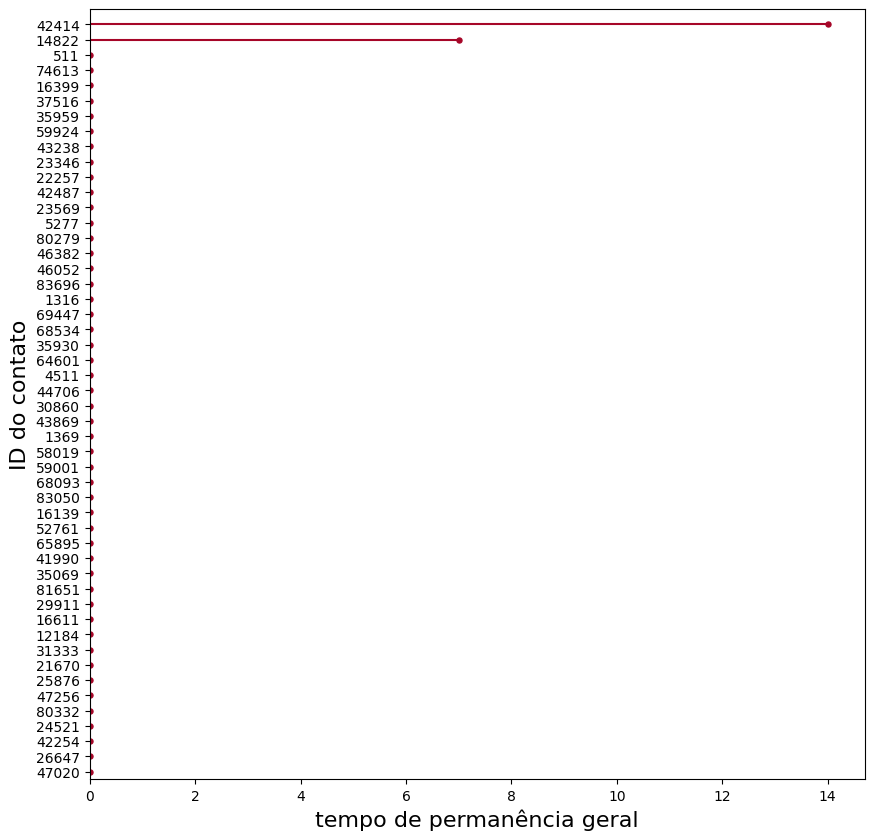

In [ ]:
EST_amostra = EST.sample(50)

plt.figure(figsize=(10,10))
plot_lifetimes(EST_amostra['perm_geral'],EST_amostra['Cliente'])
plt.ylabel('ID do contato',size=16)
plt.xlabel('tempo de permanência geral',size=16)
plt.show()

In [ ]:
# Importing KaplanMeier
from lifelines import KaplanMeierFitter

# Instantiating the fitter
kmf = KaplanMeierFitter()
# Fitting
kmf.fit(EST['perm_geral'],EST['Cliente'],label='Total')

<lifelines.KaplanMeierFitter:"Total", fitted with 85823 total observations, 81766 right-censored observations>

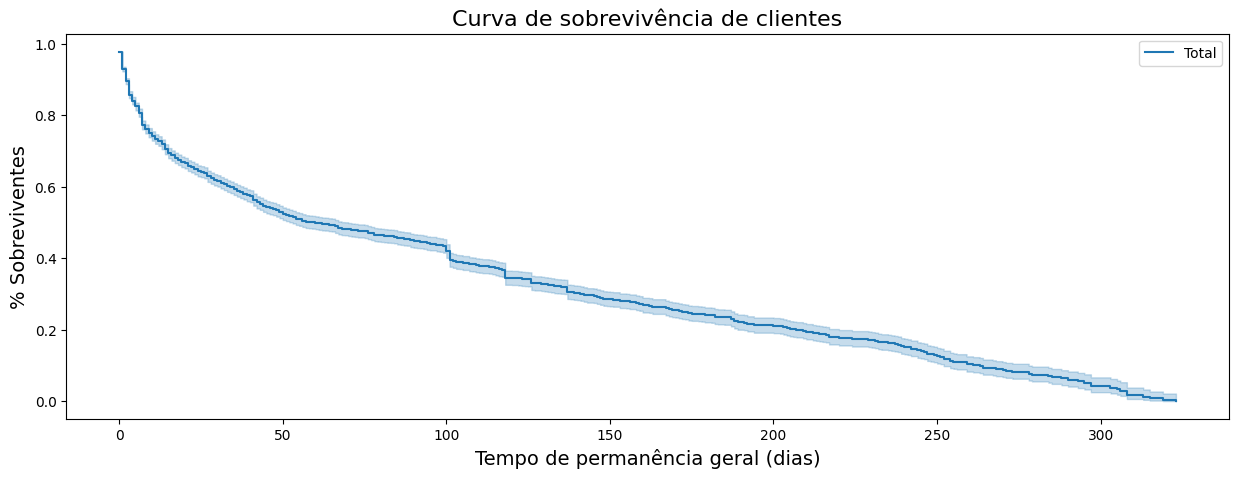

In [ ]:
# Plotting the right-censored data
plt.figure(figsize=(15,5))
kmf.plot()
plt.xlabel('Tempo de permanência geral (dias)',size=14)
plt.ylabel('% Sobreviventes',size=14)
plt.title('Curva de sobrevivência de clientes',size=16)
plt.show()

<Axes: xlabel='timeline'>

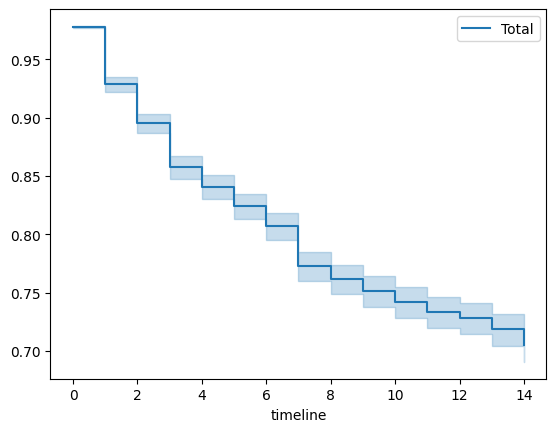

In [ ]:
kmf.plot(loc=slice(0.,14.))

Cerca de 1/3 dos leads que convertem fazem isso nas primeiras 2 semanas após entrada no Hub

<Axes: xlabel='timeline'>

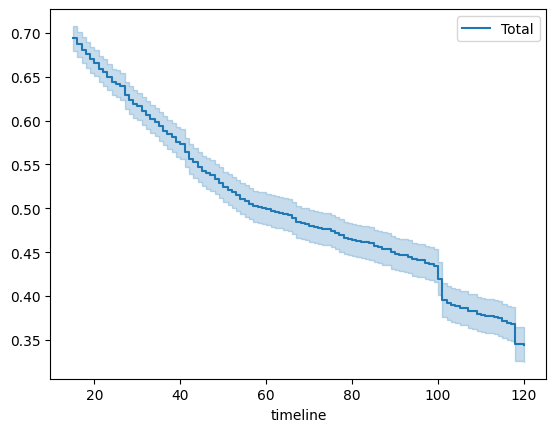

In [ ]:
kmf.plot(loc=slice(15.,120.))

<Axes: xlabel='timeline'>

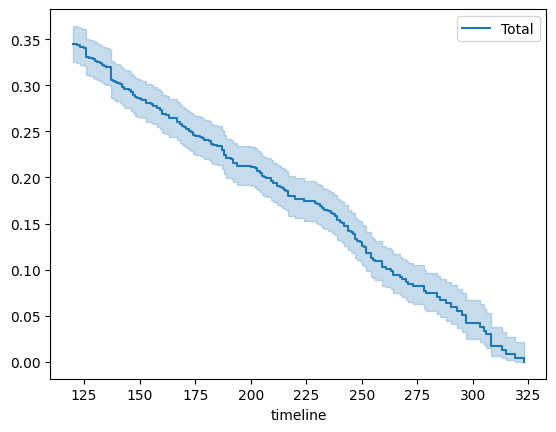

In [ ]:
kmf.plot(loc=slice(120.,330.))

### Conversion per month

<Axes: xlabel='timeline'>

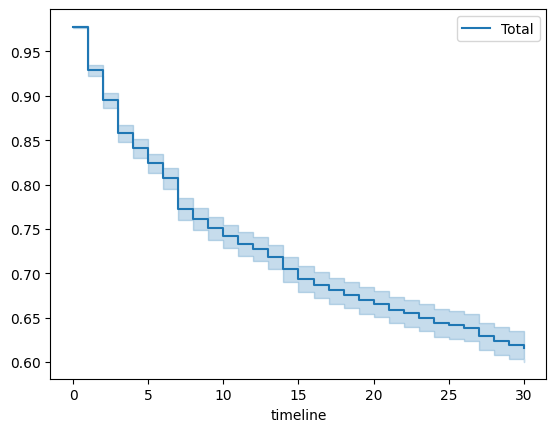

In [ ]:
kmf.plot(loc=slice(0.,30.))

In [ ]:
#Taxa de conversão geral (2023) = 4,902660162%
#Probabilidade de conversão dentre os clientes no primeiro mês é de aproximadamente 40%
#Probabilidade de conversão no primeiro mês a partir da entrada no Hub = 1,9610640648%

In [ ]:
EST.loc[(EST['perm_geral'] == 0)]

Record ID Status do contato de marketing     Data de criação  \
0      144181401           Contato de marketing 2023-09-29 08:55:00   
1      153749801          Contato não marketing 2023-11-05 14:14:00   
2      153487651           Contato de marketing 2023-11-04 07:43:00   
3      147982551           Contato de marketing 2023-10-16 06:08:00   
4      146671801           Contato de marketing 2023-10-11 12:49:00   
...          ...                            ...                 ...   
85818  111409501          Contato não marketing 2023-04-05 20:23:00   
85820  152041201           Contato de marketing 2023-10-26 21:50:00   
85821  146798401           Contato de marketing 2023-10-11 15:36:00   
85822   99613201          Contato não marketing 2023-02-14 22:48:00   
85823   96336451           Contato de marketing 2023-01-28 13:46:00   

      Data em que se tornou um cliente Data em que se tornou um lead  \
0                                  NaT           2023-09-29 08:55:00   
1                                  NaT           2023-11-05 14:14:00   
2                                  NaT           2023-11-04 07:43:00   
3                                  NaT           2023-10-16 06:08:00   
4                                  NaT           2023-10-11 12:49:00   
...                                ...                           ...   
85818                              NaT           2023-04-05 20:23:00   
85820                              NaT           2023-10-26 21:50:00   
85821                              NaT           2023-10-11 15:36:00   
85822                              NaT                           NaT   
85823                              NaT           2023-01-28 13:46:00   

      Data em que se tornou uma oportunidade  \
0                                        NaT   
1                                        NaT   
2                                        NaT   
3                                        NaT   
4                                        NaT   
...                                      ...   
85818                                    NaT   
85820                                    NaT   
85821                                    NaT   
85822                                    NaT   
85823                                    NaT   

      Data em que tornou-se um lead qualificado de vendas  \
0                                                    NaT    
1                                                    NaT    
2                                                    NaT    
3                                                    NaT    
4                                                    NaT    
...                                                  ...    
85818                                                NaT    
85820                                                NaT    
85821                                                NaT    
85822                                                NaT    
85823                                                NaT    

      Data em que tornou-se um lead qualificado para marketing  \
0                                    2023-09-29 08:55:00         
1                                                    NaT         
2                                                    NaT         
3                                                    NaT         
4                                                    NaT         
...                                                  ...         
85818                                2023-04-05 20:23:00         
85820                                                NaT         
85821                                                NaT         
85822                                2023-02-14 22:48:00         
85823                                2023-01-28 13:46:00         

      Date exited "Lead (Pipeline da fase do ciclo de vida)"  \
0                                    2023-09-29 08:55:00       
1                                                    NaT  

In [ ]:
test.iloc[51823]

Cumulative time in "Lead qualificado para marketing (Pipeline da fase do ciclo de vida)" (HH:mm:ss)    00:00:-8
Name: 51823, dtype: object

In [ ]:
EST['perm_geral'].value_counts()

0.0      81526
1.0        343
2.0        242
3.0        220
7.0        180
         ...  
229.0        1
152.0        1
258.0        1
269.0        1
303.0        1
Name: perm_geral, Length: 282, dtype: int64

In [ ]:
EST['tempo_conver_cl'].value_counts()

0.0      1914
1.0       214
3.0       156
2.0       144
7.0       130
         ... 
288.0       1
170.0       1
155.0       1
285.0       1
124.0       1
Name: tempo_conver_cl, Length: 242, dtype: int64

In [ ]:
EST['tempo_conver_op'].value_counts()

0.0      8443
1.0       161
2.0       115
5.0        93
6.0        89
         ... 
204.0       1
154.0       1
215.0       1
112.0       1
119.0       1
Name: tempo_conver_op, Length: 261, dtype: int64

In [ ]:
EST['tempo_conver_sql'].value_counts()

0.0      854
5.0       67
10.0      57
7.0       43
1.0       40
        ... 
102.0      1
82.0       1
24.0       1
106.0      1
50.0       1
Name: tempo_conver_sql, Length: 67, dtype: int64

In [ ]:
EST['tempo_conver_mql'].value_counts()

 0.0      35722
-1.0        288
 37.0        31
 6.0         28
 38.0        25
          ...  
 157.0        1
 119.0        1
 101.0        1
 127.0        1
 186.0        1
Name: tempo_conver_mql, Length: 144, dtype: int64

In [ ]:
EST['tempo_conver_l'].value_counts()

 0.0      74772
-1.0         16
 1.0          8
 2.0          6
 3.0          6
 6.0          5
 17.0         4
 8.0          2
 45.0         2
 15.0         2
 26.0         2
 14.0         2
 4.0          2
 16.0         2
 12.0         2
 11.0         2
 232.0        1
 22.0         1
 174.0        1
 21.0         1
 67.0         1
 314.0        1
 186.0        1
 68.0         1
 34.0         1
 61.0         1
 39.0         1
 109.0        1
 20.0         1
 209.0        1
 32.0         1
 73.0         1
 19.0         1
 85.0         1
 37.0         1
 130.0        1
 131.0        1
 252.0        1
 40.0         1
 88.0         1
 33.0         1
 148.0        1
 29.0         1
 77.0         1
 24.0         1
Name: tempo_conver_l, dtype: int64

## Disengagement

In [ ]:
# Para indicar desengajamento:
## Retirar clientes
### Considerando 3 meses parado no mesma etapa do funil como desengajamento, começar a olhar de oportunidade
#   para trás e adicionar "1" na variável "desengajado". Sempre retirar da adição da etapa "seguinte" os 1's da etapa
#   anterior

In [ ]:
# Fazer o Kaplan Meyer com "desengajamento" ao invés de "cliente"

In [ ]:
#Removing costumers
Des = EST.loc[pd.isna(EST['Data em que se tornou um cliente'])]

In [ ]:
data_modificacao = '2023-09-10 00:00:00'

In [ ]:
pd.to_datetime(data_modificacao)

Timestamp('2023-09-10 00:00:00')

In [ ]:
#Removing samples with less than 3 months of observation
Des = EST.loc[pd.isna(EST['Data em que se tornou um cliente']) & (EST['Data de criação'] < '2023-09-10 00:00:00')]

In [ ]:
show_keyinfo(Des)

variable            dtype  count  \
0                                           Record ID            int64  37831   
1                      Status do contato de marketing           object  37831   
2                                     Data de criação   datetime64[ns]  37831   
3                    Data em que se tornou um cliente   datetime64[ns]  37831   
4                       Data em que se tornou um lead   datetime64[ns]  37831   
5              Data em que se tornou uma oportunidade   datetime64[ns]  37831   
6   Data em que tornou-se um lead qualificado de v...   datetime64[ns]  37831   
7   Data em que tornou-se um lead qualificado para...   datetime64[ns]  37831   
8   Date exited "Lead (Pipeline da fase do ciclo d...   datetime64[ns]  37831   
9   Date exited "Lead qualificado para marketing (...   datetime64[ns]  37831   
10  Date exited "Lead qualificado para venda (Pipe...   datetime64[ns]  37831   
11  Date exited "Oportunidade (Pipeline da fase do...   datetime64[ns]  37831   
12                               Pontuação do HubSpot          float64  37831   
13                              Prioridade de contato           object  37831   
14                        Probabilidade de fechamento          float64  37831   
15                                  Área de interesse           object  37831   
16               Detalhamento da fonte mais recente 1           object  37831   
17               Detalhamento da fonte mais recente 2           object  37831   
18                          Fonte Original [Editável]           object  37831   
19                                 Fonte mais recente           object  37831   
20                       Fonte original aprofundada 1           object  37831   
21                       Fonte original aprofundada 2           object  37831   
22                              Primeira página vista           object  37831   
23                        Primeiro site de referência           object  37831   
24                            fonte_original_conteudo           object  37831   
25                                Última página vista           object  37831   
26                          Último site de referência           object  37831   
27                                       Cidade do IP           object  37831   
28   Data da primeira abertura do e-mail de marketing   datetime64[ns]  37831   
29     Data da última abertura do e-mail de marketing   datetime64[ns]  37831   
30     Data do primeiro clique do e-mail de marketing   datetime64[ns]  37831   
31       Data do último clique do e-mail de marketing   datetime64[ns]  37831   
32                       E-mails de marketing abertos          float64  37831   
33                      E-mails de marketing clicados          float64  37831   
34                                    Status do Plano           object  37831   
35                   Bloquear Recebimento de Whatsapp           object  37831   
36                       Contato criado pelo whatsapp           object  37831   
37                                    tempo_conver_cl          float64  37831   
38                                    tempo_conver_op          float64  37831   
39                                   tempo_conver_sql          float64  37831   
40                                   tempo_conver_mql          float64  37831   
41                                     tempo_conver_l          float64  37831   
42                                          perm_lead  timedelta64[ns]  37831   
43                                           perm_mql  timedelta64[ns]  37831   
44                                           perm_sql  timedelta64[ns]  37831   
45                                           perm_opt  timedelta64[ns]  37831   
46                                         perm_geral          float64  37831   
47                                            Cliente           object  37831   
48                                       perm_geral_m          float64  3783

In [ ]:
Des['Data de criação'].max()

Timestamp('2023-09-09 23:19:00')

In [ ]:
#Finding the disengaged contacts
Des['Desengajado'] = 3

In [ ]:
Des['Desengajado'].value_counts()

3    37831
Name: Desengajado, dtype: int64

In [ ]:
#Oportunidade
Des.loc[pd.notna(Des['Data em que se tornou uma oportunidade']) &
 (Des['Data em que se tornou uma oportunidade'] < '2023-09-10 00:00:00'), 'Desengajado'] = 1

In [ ]:
Des.loc[pd.notna(Des['Data em que se tornou uma oportunidade']) &
 (Des['Data em que se tornou uma oportunidade'] > '2023-09-10 00:00:00'), 'Desengajado'] = 0

In [ ]:
Des['Desengajado'].value_counts()

3    32396
1     5263
0      172
Name: Desengajado, dtype: int64

In [ ]:
#SQL
Des.loc[pd.notna(Des['Data em que tornou-se um lead qualificado de vendas']) &
 (Des['Data em que tornou-se um lead qualificado de vendas'] < '2023-09-10 00:00:00') &
        (Des['Desengajado'] == 3), 'Desengajado'] = 1

In [ ]:
Des.loc[pd.notna(Des['Data em que tornou-se um lead qualificado de vendas']) &
 (Des['Data em que tornou-se um lead qualificado de vendas'] > '2023-09-10 00:00:00') &
        (Des['Desengajado'] == 3), 'Desengajado'] = 0

In [ ]:
Des['Desengajado'].value_counts()

3    31670
1     5988
0      173
Name: Desengajado, dtype: int64

In [ ]:
#MQL
Des.loc[pd.notna(Des['Data em que tornou-se um lead qualificado para marketing']) &
 (Des['Data em que tornou-se um lead qualificado para marketing'] < '2023-09-10 00:00:00') &
        (Des['Desengajado'] == 3), 'Desengajado'] = 1

In [ ]:
Des.loc[pd.notna(Des['Data em que tornou-se um lead qualificado para marketing']) &
 (Des['Data em que tornou-se um lead qualificado para marketing'] > '2023-09-10 00:00:00') &
        (Des['Desengajado'] == 3), 'Desengajado'] = 0

In [ ]:
Des['Desengajado'].value_counts()

1    29594
3     7920
0      317
Name: Desengajado, dtype: int64

In [ ]:
#Lead
Des.loc[pd.notna(Des['Data em que se tornou um lead']) &
 (Des['Data em que se tornou um lead'] < '2023-09-10 00:00:00') &
        (Des['Desengajado'] == 3), 'Desengajado'] = 1

In [ ]:
Des.loc[pd.notna(Des['Data em que se tornou um lead']) &
 (Des['Data em que se tornou um lead'] > '2023-09-10 00:00:00') &
        (Des['Desengajado'] == 3), 'Desengajado'] = 0

In [ ]:
Des['Desengajado'].value_counts()

1    37513
0      318
Name: Desengajado, dtype: int64

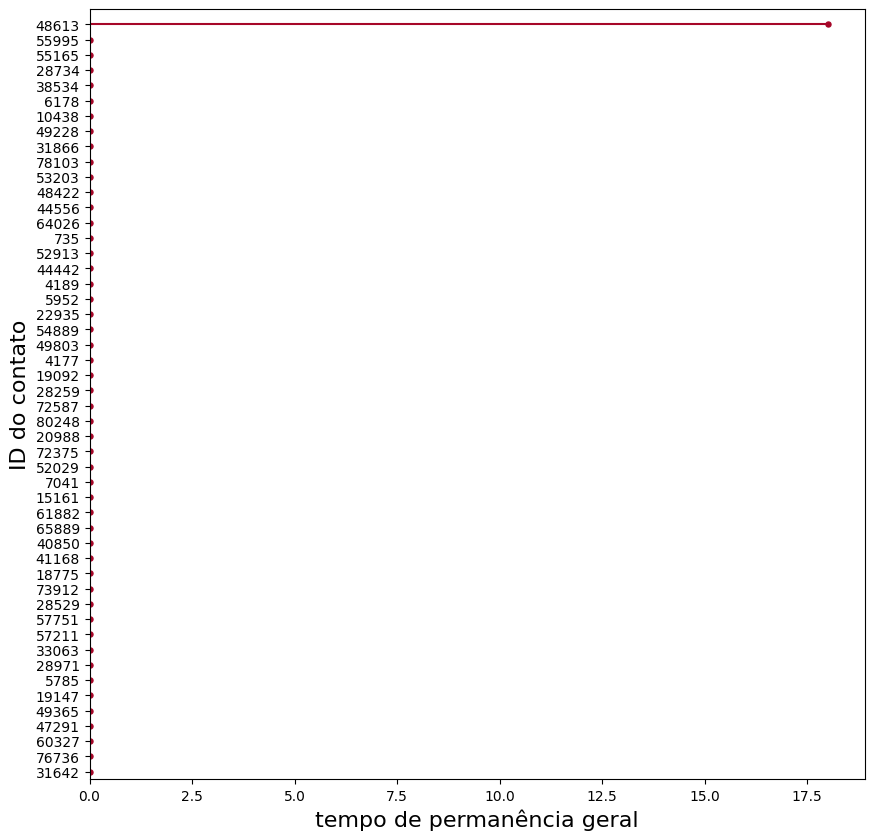

In [ ]:
Des_amostra = Des.sample(50)

plt.figure(figsize=(10,10))
plot_lifetimes(Des_amostra['perm_geral'],Des_amostra['Desengajado'])
plt.ylabel('ID do contato',size=16)
plt.xlabel('tempo de permanência geral',size=16)
plt.show()

In [ ]:
#Fitting
kmf.fit(Des['perm_geral'],Des['Desengajado'],label='Total')

<lifelines.KaplanMeierFitter:"Total", fitted with 37831 total observations, 318 right-censored observations>

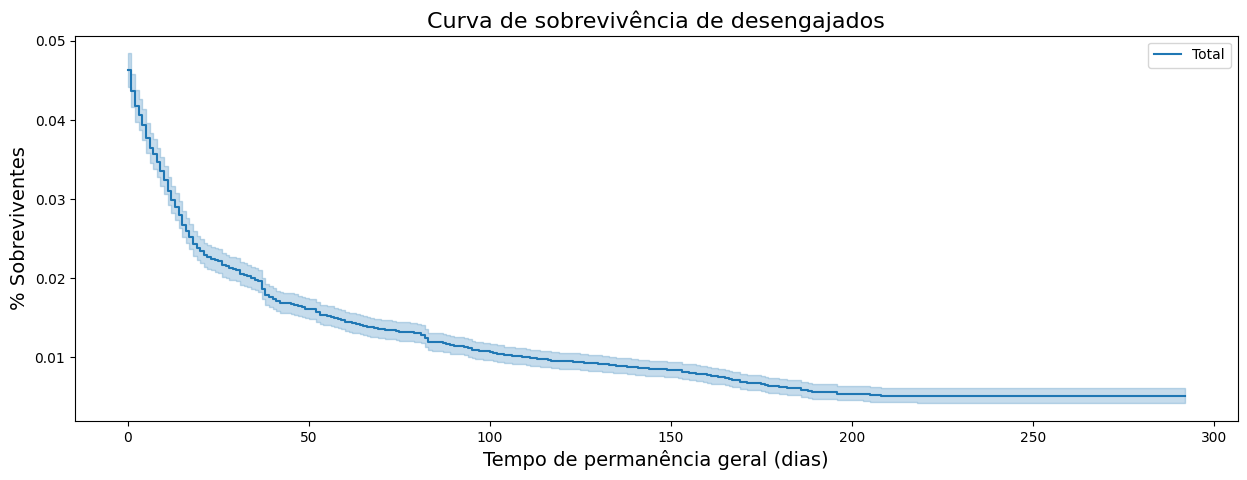

In [ ]:
# Plotting the right-censored data
plt.figure(figsize=(15,5))
kmf.plot()
plt.xlabel('Tempo de permanência geral (dias)',size=14)
plt.ylabel('% Sobreviventes',size=14)
plt.title('Curva de sobrevivência de desengajados',size=16)
plt.show()

In [ ]:
#Teorias para explicação:
## Muitos contatos desengajados apenas dão entrada
#(pode ser pra lead, mas tbm MQL ou SQL e até um avanço rápido por conta dos materiais gratuitos)
#e não avançam mais, tendo um 'perm_geral' zerado ou muito baixo

<Axes: xlabel='timeline'>

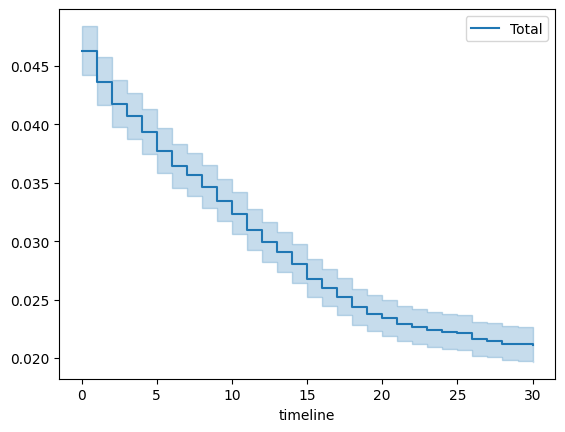

In [ ]:
kmf.plot(loc=slice(0.,30.))

<Axes: xlabel='timeline'>

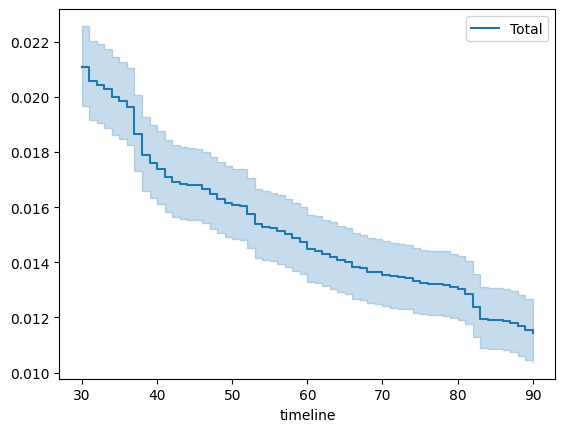

In [ ]:
kmf.plot(loc=slice(30.,90.))

<Axes: xlabel='timeline'>

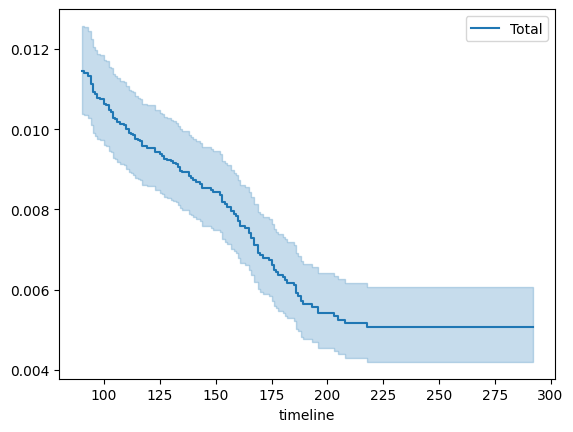

In [ ]:
kmf.plot(loc=slice(90.,400.))